### 1.1 Importar as Bibliotecas
Bibliotecas: pandas e matplotlib

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Remoção das linhas duplicadas do Dataset
E análise dos elementos presentes

In [23]:
# Leitura do arquivo csv
df = pd.read_csv("googleplaystore.csv")

# Remove linhas duplicadas
df.drop_duplicates(inplace=True)

# Impressão das primeiras linhas para checar a disposição dos elementos
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 2. Top 5 Apps por número de instalações
Análise com: Gráfico de Barras

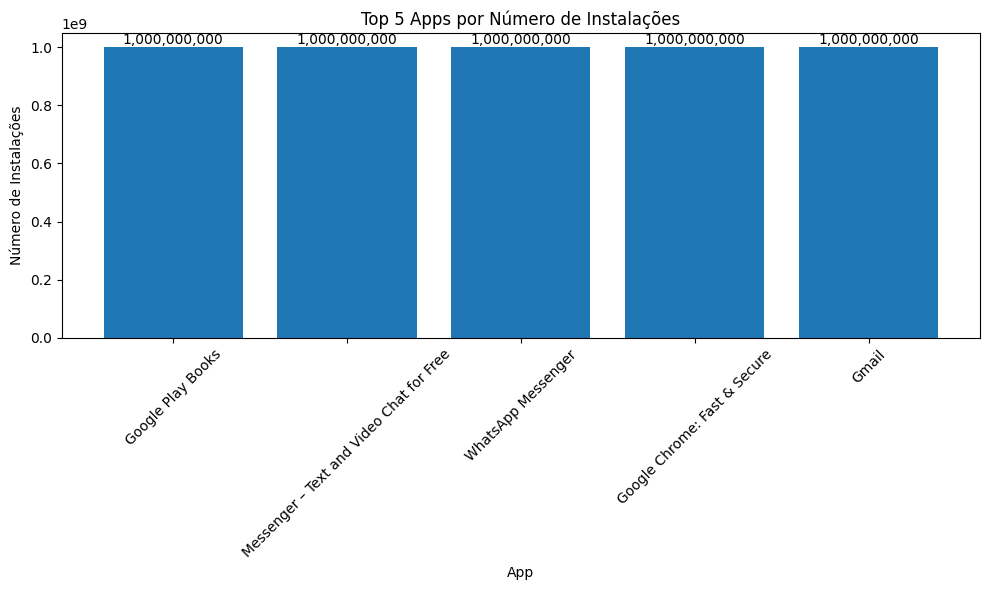

In [31]:
# Converte a coluna Installs para string
df["Installs"] = df["Installs"].astype(str)

# Remove caracteres como "+" e "," para a conversão
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True)

# Converte a coluna Installs para inteiros
df["Installs"] = df["Installs"].astype(int)

# Seleciona os 5 apps mais instalados após a conversão da coluna
top5 = df.nlargest(5, "Installs")

# Rotula as barras do gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(top5["App"], top5["Installs"])

plt.xlabel("App")
plt.ylabel("Número de Instalações")
plt.title("Top 5 Apps por Número de Instalações")
plt.xticks(rotation=45)

# Adiciona os valores em cima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f"{yval:,}",
        va="bottom",
        ha="center"
    )  # Formata o número com vírgulas

plt.tight_layout()
plt.show()



### 3. Frequência de categorias
Análise com: Gráfico de Pizza

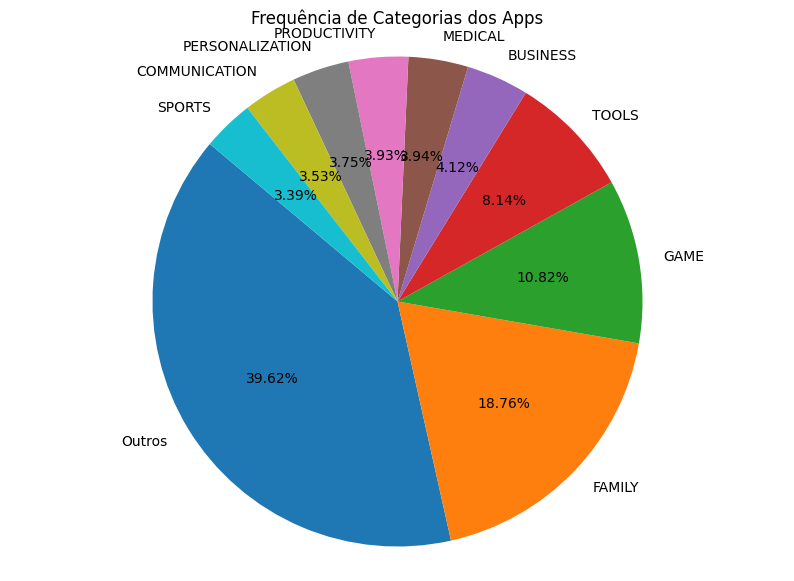

In [ ]:
# Converter a coluna Category para String para melhor manipulação de dados
df["Category"] = df["Category"].astype(str)

# Lista das categorias importantes
importantes = ["FAMILY", "GAME", "TOOLS", "MEDICAL", "BUSINESS", "PRODUCTIVITY", "PERSONALIZATION", "COMMUNICATION", "SPORTS"]

# Função para adicionar a Outros as categorias menos importantes
def ident_categoria(categoria):
    if categoria in importantes:
        return categoria
    else:
        return "Outros"

# Aplicar a função para criar uma nova coluna de categorias ajustadas
df["ajuste"] = df["Category"].apply(ident_categoria)

# Contagem da frequência de cada categoria ajustada
contagem = df["ajuste"].value_counts()

# Criação do gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(contagem, labels=contagem.index, autopct="%1.2f%%", startangle=140)
plt.title("Frequência de Categorias dos Apps")
plt.axis("equal")
plt.show()


### 4. App mais caro
Análise com: Apenas mostrar na tela

In [57]:
# Coluna Price como string
df["Price"] = df["Price"].astype(str)

# Convertendo a coluna Price para um ponto flutuante após remover o símbolo "$"
df["Price"] = df["Price"].str.replace("$", "").astype(float)

# Encontrando o App mais caro
most_expensive_app = df[df["Price"] == df["Price"].max()]

print(f"O App mais caro é: {most_expensive_app['App'].values[0]}, com o preço: ${most_expensive_app['Price'].values[0]:.2f}")



O App mais caro é: I'm Rich - Trump Edition, com o preço: $400.00


### 5. Apps classificados como Mature+17
Análise com: Apenas mostrar na tela

In [75]:
# Remove duplicações do DataFrame
df = df.drop_duplicates()

# Filtra os aplicativos classificados como Mature 17+
apps_mature17 = df[df["Content Rating"] == "Mature 17+"]

# Remove duplicações na coluna App após o filtro
apps_mature17 = apps_mature17.drop_duplicates(subset="App")

# Conta a quantidade de aplicativos classificados como Mature 17+
quantidade_apps_mature17 = apps_mature17.shape[0]

# Imprime a quantidade na tela
print(f"Quantidade de aplicativos classificados como 'Mature 17+': {quantidade_apps_mature17}")


Quantidade de aplicativos classificados como 'Mature 17+': 393


### 6. Top 10 Apps por número de review
Análise com: Listagem decrescente

In [56]:
# Convertendo a coluna Reviews para int
df['Reviews'] = df['Reviews'].astype(int)

# Remover duplicatas com base na coluna App
df = df.drop_duplicates(subset='App')

# Selecionando os top 10 apps por número de reviews
top10reviews = df.nlargest(10, 'Reviews')

# Formatando a coluna Reviews com separadores de casas de milhares e removendo o índice
print("Top 10 Apps por número de reviews:")
print(top10reviews[['App', 'Reviews']].to_string(index=False, formatters={'Reviews': '{:,}'.format}))


Top 10 Apps por número de reviews:
                                               App    Reviews
                                          Facebook 78,158,306
                                WhatsApp Messenger 69,119,316
                                         Instagram 66,577,313
          Messenger – Text and Video Chat for Free 56,642,847
                                    Clash of Clans 44,891,723
           Clean Master- Space Cleaner & Antivirus 42,916,526
                                    Subway Surfers 27,722,264
                                           YouTube 25,655,305
Security Master - Antivirus, VPN, AppLock, Booster 24,900,999
                                      Clash Royale 23,133,508


### 7. Criação de 2 calculos: Lista e valor
Criação de 2 calculos sobre o dataset que deverá ser apresentado em forma de lista e valor

In [62]:
"""

1. Formato de lista.

Faz a média das avaliações de cada categoria
levando em consideração as importantes utilizadas
anteriormente.

"""

# Categorias importantes
importantes = ["FAMILY", "GAME", "TOOLS", "MEDICAL", "BUSINESS", "PRODUCTIVITY", "PERSONALIZATION", "COMMUNICATION", "SPORTS"]

# Adicionar uma nova coluna Categoria Classificada com Outros para categorias não importantes
df['Categoria Classificada'] = df['Category'].apply(lambda x: x if x in importantes else 'Outros')

# Calcular a média de avaliações por categoria classificada
average_rating_by_classified_category = df.groupby("Categoria Classificada")["Rating"].mean()

# Mostra o resultado com a formatação de 1.2f
print("Média de Avaliações por Categoria:")
for category, avg_rating in average_rating_by_classified_category.items():
    print(f"{category}: {avg_rating:.2f}")

Média de Avaliações por Categoria:
BUSINESS: 4.10
COMMUNICATION: 4.12
FAMILY: 4.18
GAME: 4.25
MEDICAL: 4.17
Outros: 4.17
PERSONALIZATION: 4.33
PRODUCTIVITY: 4.18
SPORTS: 4.22
TOOLS: 4.04


In [76]:
""" 
2. Formato de valor.

Imprime o App com o menor número de instalações.

"""
# Garantir que a coluna Installs está no formato string
df['Installs'] = df['Installs'].astype(str)

# Remove caracteres como "+" e "," para a conversão
df["Installs"] = df["Installs"].str.replace("[+,]", "", regex=True)

# Encontrar o aplicativo com o menor número de instalações
min_installs_app = df.loc[df['Installs'].idxmin()]

# Exibir o resultado
print("Aplicativo com o menor número de instalações:\n")
print(f"App: {min_installs_app['App']}")
print(f"Installs: {min_installs_app['Installs']}")

Aplicativo com o menor número de instalações:

App: Popsicle Launcher for Android P 9.0 launcher
Installs: 0


### 8. Criação de outras formas gráficas de exibição
Exemplo: Linhas e dispersão

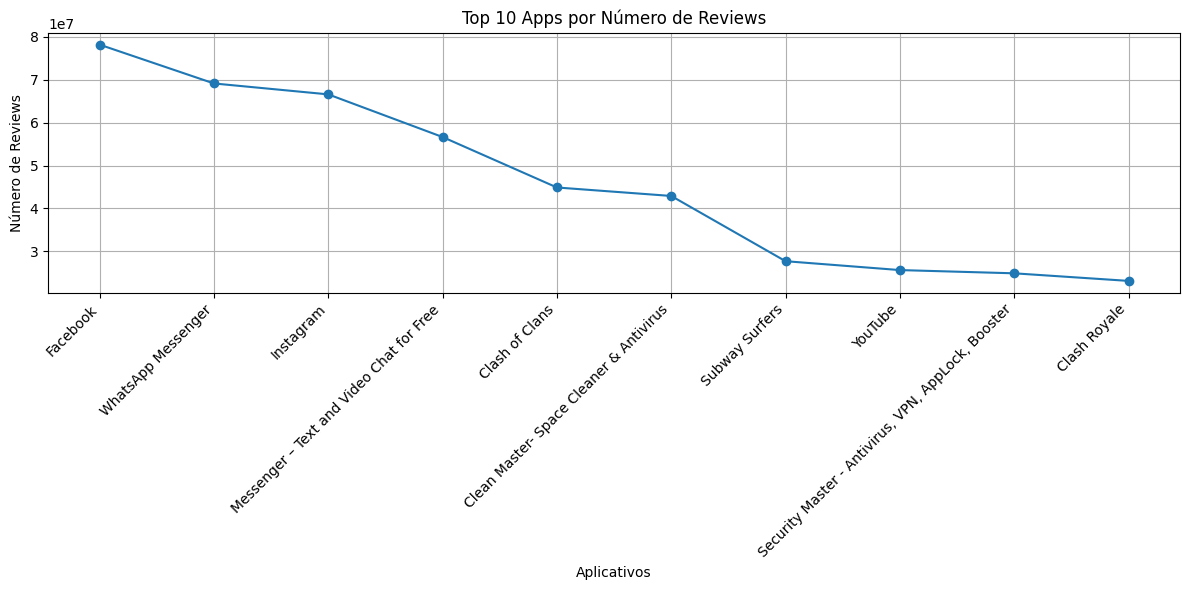

In [67]:
"""Gráfico de linhas da Etapa 6."""
# Convertendo a coluna Reviews para inteiros
df['Reviews'] = df['Reviews'].astype(int)

# Remover duplicatas com base na coluna App
df = df.drop_duplicates(subset='App')

# Selecionando os top 10 apps por número de reviews
top10reviews = df.nlargest(10, 'Reviews')

# Criando o gráfico de linha para os top 10 apps por número de reviews
plt.figure(figsize=(12, 6))
plt.plot(top10reviews['App'], top10reviews['Reviews'], marker='o', linestyle='-')
plt.title("Top 10 Apps por Número de Reviews")
plt.xlabel("Aplicativos")
plt.ylabel("Número de Reviews")
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.tight_layout()
plt.show()

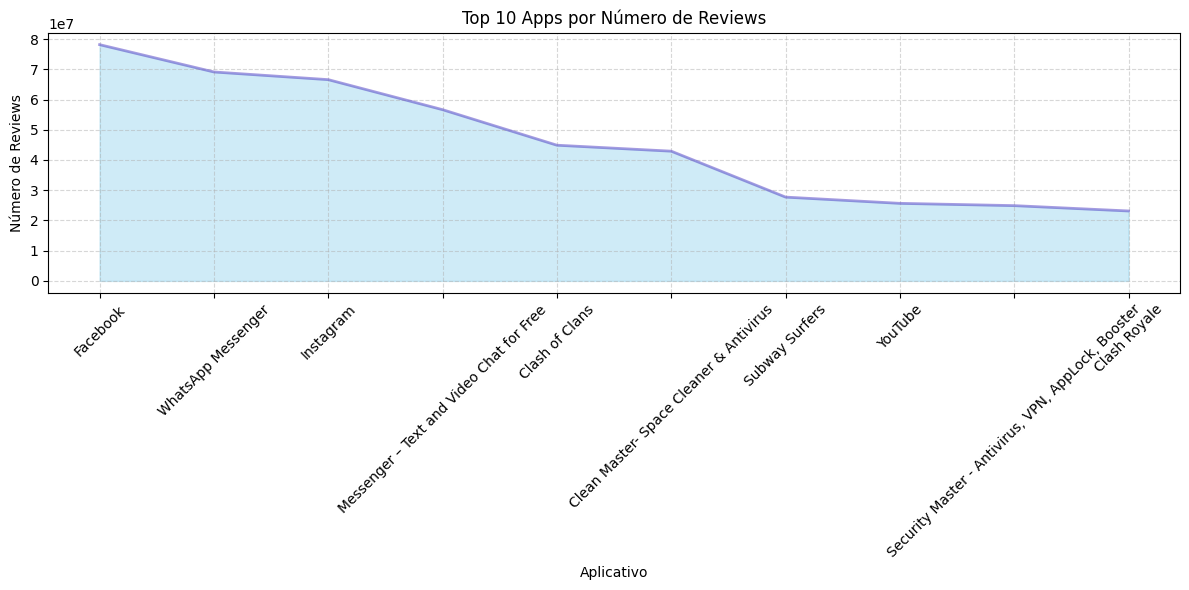

In [74]:
"""Gráfico de área da Etapa 6."""
# Selecionar os top 10 apps por número de reviews
top10reviews = df.nlargest(10, 'Reviews')

# Configurar o gráfico de área
plt.figure(figsize=(12, 6))

# Plotar o gráfico de área
plt.fill_between(top10reviews['App'], top10reviews['Reviews'], color='skyblue', alpha=0.4)
plt.plot(top10reviews['App'], top10reviews['Reviews'], color='Slateblue', alpha=0.6, linewidth=2)

# Títulos e rótulos
plt.title('Top 10 Apps por Número de Reviews')
plt.xlabel('Aplicativo')
plt.ylabel('Número de Reviews')

# Ajustar a rotação dos rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Adicionar uma grade para melhor visualização
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()
